### Animation of an event recorded at different latitudes; the time-shift in the detection across different magnetometers is apparent

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
import pandas as pd

In [2]:
# SSC on 2012-04-23 03:20:02
ssc_example = pd.read_csv('data/events_2012/2012-04-23.csv')
ssc_example['Date_UTC'] = pd.to_datetime(ssc_example['Date_UTC'])
ssc_example.sort_values(by='Date_UTC', inplace=True)
ssc_example

,Date_UTC,Extent,IAGA,GEOLON,GEOLAT,MLT,MCOLAT,IGRF_DECL,SZA,dbn_nez,dbe_nez,dbz_nez,dbn_geo,dbe_geo,dbz_geo,PC2_IPOW,PC3_IPOW,PC4_IPOW,PC5_IPOW
0,2012-04-23 00:00:00,1,A08,125.40,7.00,8.49,90.85,-0.20,53.60,22.1,-0.3,-2.2,22.1,-0.4,-2.2,0.561797,1.595595,1.848319,3.287082
35,2012-04-23 00:00:00,1,NAN,298.30,56.40,20.82,26.10,-24.39,101.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2012-04-23 00:00:00,1,ONW,141.47,38.43,9.58,58.62,-7.84,42.52,-17.7,9.3,3.0,-16.3,11.7,3.0,-0.186074,0.031117,0.842847,2.168788
37,2012-04-23 00:00:00,1,PG1,77.20,-85.50,21.55,166.55,-99.77,103.52,-20.2,0.5,3.7,3.9,19.8,3.7,-0.416780,0.246626,2.374928,4.209554
38,2012-04-23 00:00:00,1,PG2,57.96,-84.42,21.91,165.24,-78.67,105.47,-33.6,4.5,-4.0,-2.2,33.8,-4.0,-1.289282,0.263335,2.361460,4.331254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615962,2012-04-23 23:59:59,1,LET,247.13,49.64,15.97,33.12,14.31,65.57,223.4,-67.7,210.5,233.2,-10.3,210.5,0.198996,2.496461,5.201949,6.337815
5615963,2012-04-23 23:59:59,1,LGZ,123.74,13.10,8.39,84.48,-1.43,54.49,-78.0,3.7,-5.6,-77.9,5.7,-5.6,-2.147087,0.105956,2.527526,3.957758
5615964,2012-04-23 23:59:59,1,LKW,99.78,6.30,6.81,92.00,-0.36,78.89,-79.9,30.9,3.7,-79.7,31.4,3.7,-2.266287,0.129764,2.458198,3.867735
5615949,2012-04-23 23:59:59,1,EUS,-38.43,-3.88,21.64,96.82,-21.37,112.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# event time
t = pd.Timestamp('2012-04-23 03:20:02')
# +/- deltatime mins
deltatime = 5
time_mask = (ssc_example['Date_UTC'] >= t - pd.Timedelta(minutes=deltatime)) & (ssc_example['Date_UTC'] <= t + pd.Timedelta(minutes=deltatime))
ssc_masked = ssc_example.loc[time_mask].reset_index(drop=True)

In [4]:
ssc_masked[['GEOLAT', 'GEOLON', 'Date_UTC', 'IAGA', 'dbn_nez']]

,GEOLAT,GEOLON,Date_UTC,IAGA,dbn_nez
0,60.02,248.05,2012-04-23 03:15:02,SMI,-1.3
1,52.14,246.16,2012-04-23 03:15:02,RED,-5.2
2,62.82,267.89,2012-04-23 03:15:02,RAN,5.7
3,58.22,256.32,2012-04-23 03:15:02,RAL,11.7
4,-0.05,109.25,2012-04-23 03:15:02,PTN,NaN
...,...,...,...,...,...
39060,56.38,265.36,2012-04-23 03:25:02,GIM,73.6
39061,68.60,264.10,2012-04-23 03:25:02,GHC,-17.4
39062,62.30,214.70,2012-04-23 03:25:02,GAK,56.7
39063,66.57,214.70,2012-04-23 03:25:02,FYU,56.6


In [5]:
# standadize stations time series
def standardize_series(series):
    mean = series.mean()
    std = series.std()
    return (series - mean) / std

ssc_masked['dbn_nez'] = ssc_masked.groupby('IAGA')['dbn_nez'].transform(standardize_series)

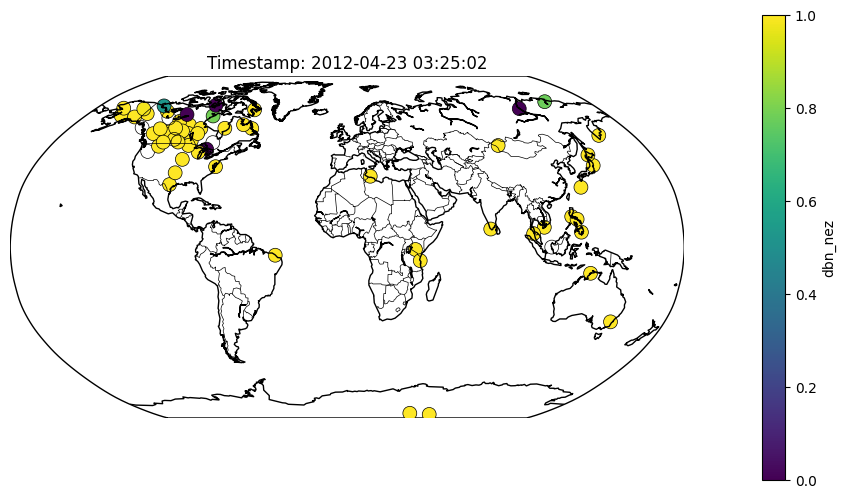

In [6]:
# set map
fig, ax = plt.subplots(figsize=(10, 8))

# m = Basemap(projection='cyl', # this projection misses north america
#             lat_1=33, lat_2=45, lon_0=-95,
#             llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, 
#             resolution='c', ax=ax)
m = Basemap(projection='robin', lon_0=0, resolution='c', ax=ax)

m.drawcoastlines()
m.drawcountries()

# scatterplot
sc = m.scatter([], [], c=[], cmap='viridis', s=100, edgecolors='k', linewidth=0.5)

# set colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
cbar.set_label('dbn_nez')

title = ax.set_title('')

def update(frame):
    df_frame = ssc_masked[ssc_masked['Date_UTC'] == frame]
    x, y = m(df_frame['GEOLON'].values, df_frame['GEOLAT'].values)
    sc.set_offsets(list(zip(x, y)))
    sc.set_array(df_frame['dbn_nez'])
    title.set_text(f'Timestamp: {frame}')
    return sc, title

# create animation
ani = animation.FuncAnimation(fig, update, frames=ssc_masked['Date_UTC'].unique(), blit=True)

# save animation
ani.save('img/SSC.gif', writer='pillow', fps=50) # fps for speed

plt.show()
